# OLS Regression - continued

# A statistical model for inference 

### So far we did not assume any specific *true* relationship between $y$ and $x$

### Let us now *assume* the following model: 
$$ y = \beta_0 + \beta_1 x_1 + \ldots + \beta_p x_p + \epsilon,\;\;\epsilon \sim N(0,\sigma^2),\;\;\;\;\Rightarrow\;\; y|x \sim N (x^T\beta, \sigma^2).$$
1. $E(y|x) = x^T\beta$ is a linear function of $x$
2. The error $(y-E(y|x))$ has a normal distribution and is independent for each observation

### If this assumption holds, we can investigate the distribution of $\hat{\beta}$ and use that to do inference on the model


# Distribution of the OLS solution under the model assumptions:  

### What we know: 
$$  (a)\; E(Y) = X\beta,\;\;\;\; (b)\; Cov(Y) = \sigma^2 I_n ,\;\;\;\;(c)\; \hat{\beta} = (X^TX)^{-1} X^T Y$$

### Mean: 
$$E(\hat{\beta}) \stackrel{(c)}{=} (X^TX)^{-1} X^T E(Y) \stackrel{(a)}{=} (X^TX)^{-1} X^T X\beta = \beta.$$

### Covariance matrix: 
$$ Cov(\hat{\beta}) \stackrel{(c)}{=} (X^TX)^{-1} X^T Cov(Y) X (X^TX)^{-1} \stackrel{(b)}{=} \sigma^2 (X^TX)^{-1} (X^T X) (X^TX)^{-1} = \sigma^2 (X^TX)^{-1}.$$


# Statistical inference

### From the previous formulas we conclude: $ \hat{\beta}_j \sim N(\beta_j, \sigma^2 (X^TX)^{-1}_{j,j}).$

### Recall that our second goal (beyond prediction) was *inference*: which variables are important?  

### Now we can formalize this as a hypothesis test: for each variable $j$, test the null $H_{0j}: \beta_j = 0.$

### If $H_{0j}$ holds, then $ \hat{\beta}_j \sim N(0, \sigma^2 (X^TX)^{-1}_{j,j}).$

### Assuming $\sigma^2$ is known, this leads to a simple $Z$-test as we studied

### Since $\sigma^2$ is not known, we need to estimate it and get a $T$-test instead (details omitted). 

# Back to the 14-movies model, now with the inference: 

In [154]:
print(results14.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.276
Model:                            OLS   Adj. R-squared:                  0.275
Method:                 Least Squares   F-statistic:                     217.7
Date:                Tue, 30 Apr 2019   Prob (F-statistic):               0.00
Time:                        09:49:26   Log-Likelihood:                -9690.2
No. Observations:                8000   AIC:                         1.941e+04
Df Residuals:                    7985   BIC:                         1.952e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                                             coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------

# OLS regression summary

### Minimize RSS on $Tr$ to find the "best" linear fit for $Y$ as a function of $X$

### Algebraic solution, geometric interpretation: projection

### Under the assumed statistical model (strong assumptions!) can do inference on which variables are important

### The most important tool in the statistical/predictive modeling toolbox!

### Learn more: Statistical Models course in Statistics

# OLS interpretation: estimating conditional expectation

### As we just saw, under the statistical model, $E\hat{\beta} = \beta \;\Rightarrow\; E(\hat{y}|x) = x^T E (\hat{\beta}) =  x^T \beta = E(y|x).$  

### Even when the model doesn't hold, the use of RSS / squared error loss implies estimation of conditional expectation (details omitted)

### Hence an interpretation of the OLS prediction is an *attempt* to estimate the conditional expectation $E(y|x)$

### This conditional expectation is clearly interesting: it summarizes what we learned about $y$ from seeing $x$

### The attempt may not be successful, if the model is not so good (more on that later), but at least we know what we are trying to predict!

# What about classification?

### We will focus on the simplest (and most important) case of two-class classification: 
* Girl vs boy
* Sick vs healthy
* Buy vs don't buy

### As before, we have $Tr = (X,Y)$ of size $n$, $Te$ of size $m$. 

### For now, keep assuming $x \in \mathbb R^p$ is numeric as in the eBay shirts example

### Can we use the OLS mechanism we have built to build a classification model? 

### For sure we can, if we encode $y=girl\Rightarrow y=1,\;\;y=boy\Rightarrow y=0$, we have numeric $y$

# What is wrong with using OLS for classification? 

### If we encode $y$ as above what is $E(y|x)$? It is $P(y=girl|\;picture)$ --- a clearly interesting quantity

### Problem: as a probability, $0\leq P(y=girl|\;picture) \leq 1.$ But model predictions $x^T\hat{\beta}$ can fall outside the legal range!

### Another problem: can we make the model assumptions of normal $\epsilon$? No --- because $y$ can only be $0$ or $1$

### The idea: try to create an approach that is similar to OLS, but more fitting for classification, taking into account the limited range of values and the need for a sensible statistical model



# Logistic regression

### Deals with the two problems above

### We start from assuming a model: 
$$ \log\frac{P(y=1|x)}{P(y=0|x)} = x^T\beta$$

### Notice that now all values are legal: 
$$ 0\leq P(y=1|x) \leq 1 \;\; \Leftrightarrow\;\; -\infty \leq \log\frac{P(y=1|x)}{P(y=0|x)} \leq \infty.$$

### Another way of writing this: 
$$ P(y=1|x) = \frac{\exp(x^T\beta)}{1+\exp(x^T\beta)} $$
$$ P(y=0|x) = 1- P(y=1|x) = \frac{1}{1+\exp(x^T\beta)} $$


# Fitting a logistic regression

### Given training data $Tr$, we want to find the best coefficients $\hat{\beta}.$

### This is done by maximum likelihood, finding $\beta$ to maximize: 
$$ \max_\beta \prod_{i=1}^n  \left(\frac{\exp(x_i^T\beta)}{1+\exp(x_i^T\beta)}\right)^{y_i} \left(\frac{1}{1+\exp(x_i^T\beta)}\right)^{1-y_i}$$

### The solution is $\hat{\beta}$, the logistic regression coefficients estimates

### Predicting on $x \in Te$: 
$$ \widehat{P(y=1|x)} = \frac{\exp(x^T\hat{\beta})}{1+\exp(x^T\hat{\beta})}\;\; \Rightarrow\;\; \hat{y} = \left\{ \begin{array}{ll} 1 & \mbox{if} \widehat{P(y=1|x)}> 0.5 \\
0 & \mbox{otherwise}\end{array}\right. $$


# Interpretation of coefficients

### We can write our model as: 
$$\log\frac{P(y=1|x)}{P(y=0|x)} = x^T\beta$$

### The expression on the left is called the *log odds*: log of the ratio of positive vs negative probability

### Interpretation: ${\beta}_j$ is the change in the log odds from a change of 1 unit in $x_j$. 

### For example, if ${\beta}_j=1$ then when $x_j=1$ vs $x_j=0$ the log odds increase by $1$, so the odds increase times $e=2.72$, which is roughly the increase in ${P(y=1|x)}$ when it is close to $0$. 

### When estimating from $Tr$: add hats over all quantities and remember these are only estimates!

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats.stats import pearsonr
import warnings
import math
import random
from sklearn.decomposition import PCA

%matplotlib inline


saheart = pd.read_table("http://statweb.stanford.edu/~hastie/ElemStatLearn/datasets/SAheart.data", header = 0,sep=',',index_col=0)
saheart.head()

saheart_X=pd.get_dummies(saheart.iloc[:,:9]).iloc[:,:9]
saheart_y=saheart.iloc[:,9]

In [48]:
saheart.describe()

,sbp,tobacco,ldl,adiposity,typea,obesity,alcohol,age,chd
count,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000
mean,138.326840,3.635649,4.740325,25.406732,53.103896,26.044113,17.044394,42.816017,0.346320
std,20.496317,4.593024,2.070909,7.780699,9.817534,4.213680,24.481059,14.608956,0.476313
min,101.000000,0.000000,0.980000,6.740000,13.000000,14.700000,0.000000,15.000000,0.000000
25%,124.000000,0.052500,3.282500,19.775000,47.000000,22.985000,0.510000,31.000000,0.000000
50%,134.000000,2.000000,4.340000,26.115000,53.000000,25.805000,7.510000,45.000000,0.000000
75%,148.000000,5.500000,5.790000,31.227500,60.000000,28.497500,23.892500,55.000000,1.000000
max,218.000000,31.200000,15.330000,42.490000,78.000000,46.580000,147.190000,64.000000,1.000000


In [57]:
n = saheart_X.shape[0]
tr_size = math.floor(0.8*n)
te_size = n-tr_size
tr_ind = random.sample(range(n),tr_size)
Xtr = saheart_X.iloc[tr_ind,:]
Xte = saheart_X.drop(saheart_X.index[tr_ind])
Ytr = saheart_y.iloc[tr_ind]
Yte = saheart_y.drop(saheart_y.index[tr_ind])

print(n,Xtr.shape, Xte.shape, Ytr.shape, Yte.shape)

462 (369, 9) (93, 9) (369,) (93,)


## The predictive modeling way: using sklearn

In [58]:
from sklearn.linear_model import LogisticRegression
mod = LogisticRegression(solver='lbfgs',max_iter=10000)
mod.fit (Xtr, Ytr)
print('intercept:', mod.intercept_)
print('coef:',mod.coef_)

intercept: [-5.8570881]
coef: [[ 0.00261356  0.09891859  0.17304114  0.01014803  0.03958216 -0.03098118
  -0.00087939  0.05461037 -0.79788522]]


## The statistics modeling way: using statsmodels

In [59]:
import statsmodels.api as sm
logit_model=sm.Logit(Ytr, sm.add_constant(Xtr))
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.502271
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                    chd   No. Observations:                  369
Model:                          Logit   Df Residuals:                      359
Method:                           MLE   Df Model:                            9
Date:                Tue, 07 May 2019   Pseudo R-squ.:                  0.2219
Time:                        09:49:25   Log-Likelihood:                -185.34
converged:                       True   LL-Null:                       -238.19
                                        LLR p-value:                 1.101e-18
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -5.8241      1.478     -3.941      0.000      -8.721      -2.927
sbp              

In [67]:
from sklearn.metrics import confusion_matrix
phat = result.predict(sm.add_constant(Xte))
yhat = phat>0.5
conf =confusion_matrix(Yte, yhat) 
print(conf)
print('Accuracy:',round((conf[0,0]+conf[1,1])/te_size,3), 'Misclassification loss:', round((conf[0,1]+conf[1,0])/te_size,3))

[[50 11]
 [16 16]]
Accuracy: 0.71 Misclassification loss: 0.29


## Classification models performance evaluation on test set: different measures

### Different errors have different costs/value. 

### A way to capture this: summarize performance in different ways that capture different types of errors:

#### $P = \sum_{i=n+1}^{n+m} y_i$ number of positive examples, similarly $N$.

#### $\hat{P} = \sum_{i=n+1}^{n+m} \hat{y}_i$ number of positive predictions, similarly $\hat{N}$.

#### $TP = \sum_{i=n+1}^{n+m} y_i \hat{y}_i$ number of true positives, $FP = \hat{P}-TP$

#### $TN = \sum_{i=n+1}^{n+m} (1-y_i) (1-\hat{y}_i)$ number of true negatives, $FN = \hat{N}-TN$




### Prediction error: $\;(FN+FP)/m$

### Precision (positive predictive value): $\;TP/\hat{P}$

### Recall (sensitivity, true positive rate):  $\;TP/P$

### False positive rate: $\;FP/N$

### Harmonic mean of precision and recall: $\;F_1 = 2* \frac{Precision \times Recall}{Precision + Recall}$. 


In [61]:
from sklearn.metrics import classification_report

print(classification_report(Yte, yhat))

              precision    recall  f1-score   support

           0       0.76      0.82      0.79        61
           1       0.59      0.50      0.54        32

   micro avg       0.71      0.71      0.71        93
   macro avg       0.68      0.66      0.66        93
weighted avg       0.70      0.71      0.70        93



# Classification model evaluation: different goals

### We can think of several different prediction goals, all potentially important: 
1. Classify correctly --- make few (weighted) errors on test set or new prediction points
2. Predict probabilities well: $$ \widehat{P(y=1|x)} \approx P(y=1|x)$$ for new points
3. Rank well: given multiple prediction points, predict which one is *more likely* to have $y=1$. 


### These different tasks can reflect in the loss function / model evaluation task:
1. Correct classification: misclassification loss as above, also precision, recall etc.
2. Good probability prediction: using Bernoulli loss / cross entropy: 
$$ L(y,\hat{p}) = \hat{p}^y (1-\hat{p})^{(1-y)}.$$
3. How do we measure ranking perofrmance of a model on a test set? 

# The ROC Curve and the Area Under Curve (AUC)

### The idea: to evaluate ranking performance, do not set the threshold $0.5$ but check what happens at all possible thresholds: 
1. True positive rate: what % of the positive observations pass the threshold?
2. False positive rate: what % of the negative observations pass the threshold?

### The ROC curve plots TPR vs FPR for all possible threholds: if the model ranks well, for high thresholds we will have $FPR\approx 0$, while for low thresholds we will have $TPR \approx 1$. 

### Note that even if $\widehat{P(y=1|x)}$ predicts probabilities badly, or even if the predictions are not in the range $[0,1]$, the ranking can still be good. 

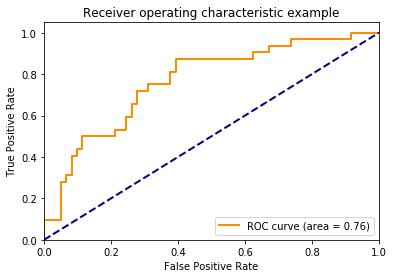

In [69]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, _ = roc_curve(Yte, phat)
roc_auc = auc(fpr, tpr)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic curve for our logistic model')
plt.legend(loc="lower right")
plt.show()

# The area under the curve (AUC)

### *For a random ranking:* $FPR \approx TPR$ at every threshold, so we are around the diagonal $x=y$: $$AUC\approx 0.5.$$

### *For a perfect ranking model:* at high thresholds, $FPR=0$, at low thresholds $TPR=1$, hence: $$AUC=1.$$

### Very nice interpretation of AUC: Assume the test set has $m_1$ ones ($y=1$) and $m_0$ zeros, then AUC is the % of correctly ranked pairs with different response: 
$$ AUC = \frac{ \#\left\{(i,j): y_i = 0, y_j=1 \mbox{ and } \hat{p}_i < \hat{p}_j\right\}}{m_1\times m_0}.$$

# Global vs local modeling

### So far we have learned two predictive modeling techniques: OLS regression and logistic regression 

### Common theme: Global, parametric models (+ probabilistic model for inference) --- lots of assumptions!

### A different approach: *Local* modeling: I am similar to my neighbors

### Simple example: 1-nearest neighbor:

1. Define a distance over the $\cal X$ space. For $x\in \mathbbb R^p$ can simply choose the Euclidean distance: 
$$d(x,u) = \|x-u\|^2.$$
2. For a prediction point (say $x_0 \in Te$), find its nearest neighbor in the Tr
$$ i_0 = \arg\min_i d(x_0,x_i).$$
3. Predict $x_0$ as the response at the nearest neighbor $\hat{y}_0 = y_{i_0}.$

# K-nearest neighbor (KNN) methods

### Repeat the same steps, but instead of finding the nearest neighbor only, find the $k$ nearest points in $Tr$ to $x_0$. Assume their indexes are $i_{01},...,i_{0k}.$


### For regression predict the average: 
$$\hat{y}_0 = \frac{1}{k} \sum_{j=1}^k y_{i_{0j}}.$$

### For classification predict the majority: 
$$\hat{y}_0 = \left\{ \begin{array}{ll} 1 & \mbox{if} \frac{1}{k} \sum_{j=1}^k y_{i_{0j}} > 1/2  \\
0 & \mbox{otherwise}\end{array} \right.$$


# The problem with KNN? 

### If the data are "sparse" in the space, nearest neighbors are far and the results can be very bad

### *Curse of dimensionality*: if the dimension $p$ is high,  data are by definition sparse

### KNN fails in these settings

### Interesting solution: Adaptive local methods (*trees!*) => next week
